/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.9004 - loss: 0.3260
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9846 - loss: 0.0484
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9904 - loss: 0.0317
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9931 - loss: 0.0235
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9944 - loss: 0.0168
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9872 - loss: 0.0444

Test accuracy: 0.9899
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


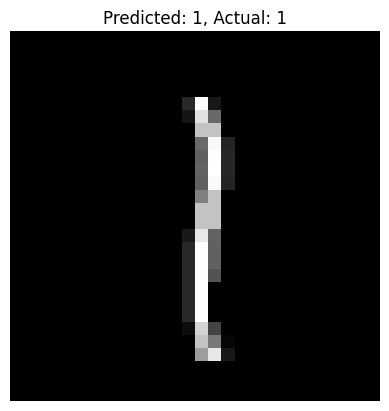

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


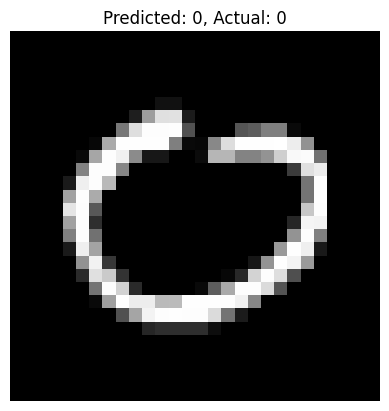

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


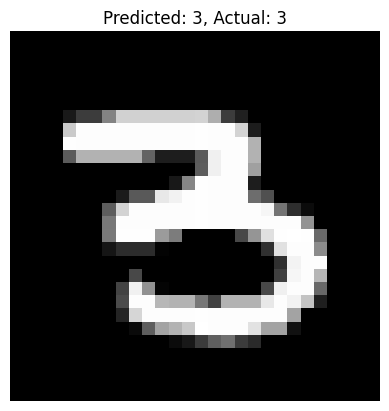

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


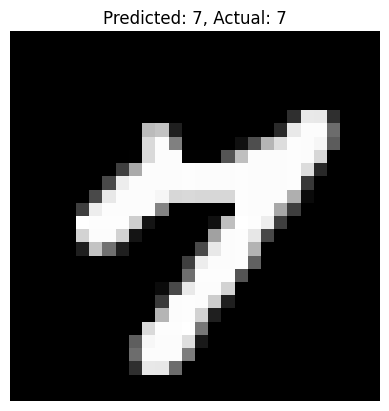

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


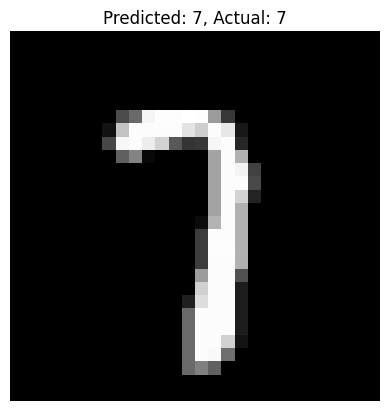

In [ ]:
# Import necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset from Keras datasets
# This gives us training and test sets of 28x28 grayscale images
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to the range [0, 1] for better training performance
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the data to include a channel dimension (needed for Conv2D)
# MNIST images are grayscale, so we add a single channel (1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Build the CNN model using Keras Sequential API
model = tf.keras.models.Sequential([
    # First convolutional layer: 32 filters, 3x3 kernel, ReLU activation
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),  # Downsample with max pooling

    # Second convolutional layer: 64 filters
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flatten the output to feed into dense layers
    tf.keras.layers.Flatten(),

    # Fully connected layer with 64 neurons
    tf.keras.layers.Dense(64, activation='relu'),

    # Output layer: 10 neurons for 10 digit classes, softmax for probabilities
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model with optimizer, loss function, and evaluation metric
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model for 5 epochs
model.fit(x_train, y_train, epochs=5)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest accuracy: {test_acc:.4f}")

# Visualize predictions on 5 sample test images
# Select 5 random indices from the test set
sample_indices = np.random.choice(len(x_test), 5, replace=False)

for i in sample_indices:
    image = x_test[i]
    label = y_test[i]

    # Predict the class using the trained model
    prediction = model.predict(image.reshape(1, 28, 28, 1))
    predicted_label = np.argmax(prediction)

    # Plot the image with predicted and actual labels
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f"Predicted: {predicted_label}, Actual: {label}")
    plt.axis('off')
    plt.show()